In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


   Age  Experience (years)  Work Hours (per week) Country  Salary ($)
0   25                   3                     40     USA       45000
1   30                   5                     45   India       55000
2   35                   8                     50     USA       70000
3   28                   2                     35   India       40000
4   32                   6                     42     USA       60000
5   29                   4                     38   India       48000
6   40                  10                     50     USA       75000
7   22                   1                     30   India       32000
8   27                   3                     40     USA       46000
9   34                   7                     48   India       65000


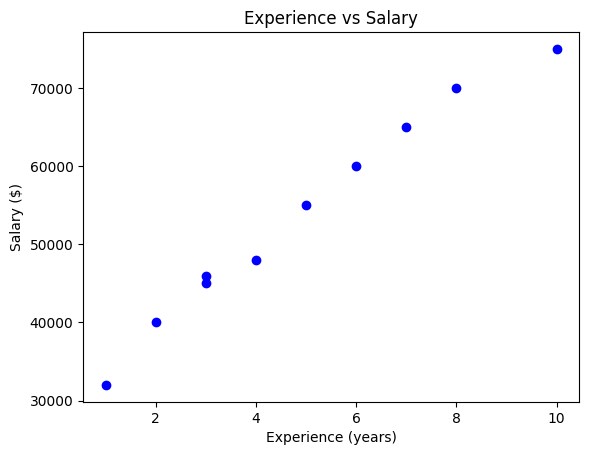

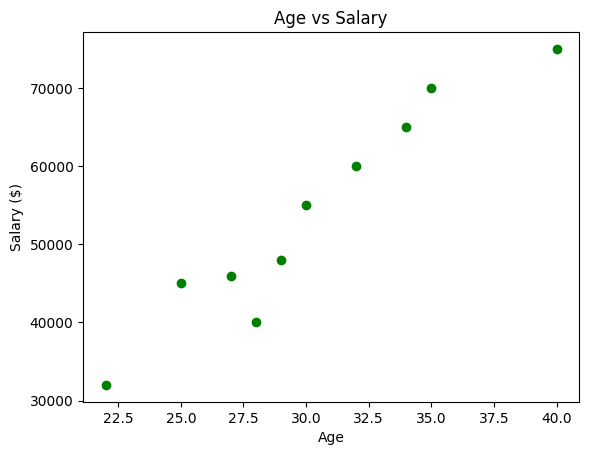

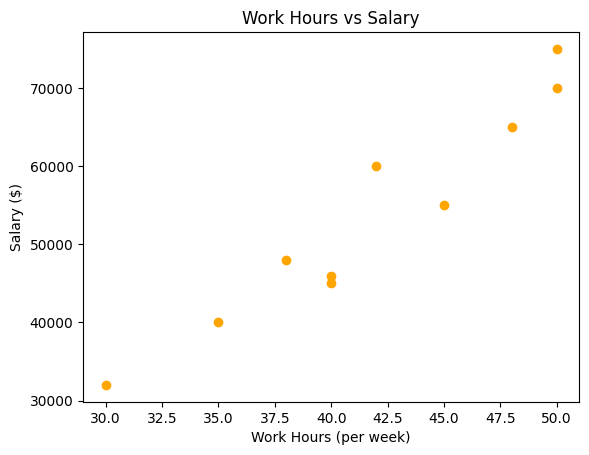

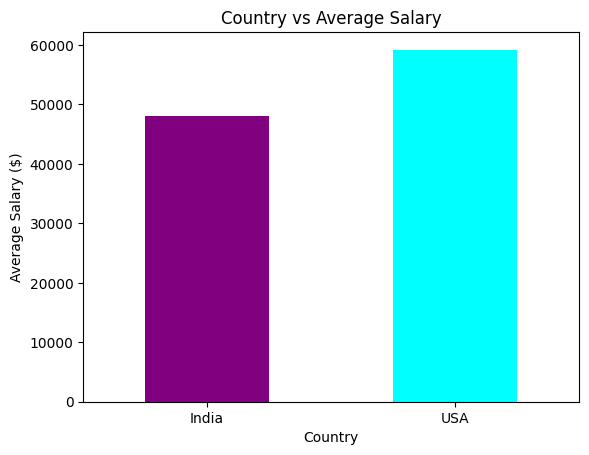

In [ ]:
# Load manually crafted dataset
data = {
    "Age": [25, 30, 35, 28, 32, 29, 40, 22, 27, 34],
    "Experience (years)": [3, 5, 8, 2, 6, 4, 10, 1, 3, 7],
    "Work Hours (per week)": [40, 45, 50, 35, 42, 38, 50, 30, 40, 48],
    "Country": ["USA", "India", "USA", "India", "USA", "India", "USA", "India", "USA", "India"],
    "Salary ($)": [45000, 55000, 70000, 40000, 60000, 48000, 75000, 32000, 46000, 65000],
}
df = pd.DataFrame(data)

# Display first few rows
print(df)
plt.scatter(df["Experience (years)"], df["Salary ($)"], color='blue')
plt.title("Experience vs Salary")
plt.xlabel("Experience (years)")
plt.ylabel("Salary ($)")
plt.show()

# Scatter plot: Age vs. Salary
plt.scatter(df["Age"], df["Salary ($)"], color='green')
    plt.title("Age vs Salary")
    plt.xlabel("Age")
    plt.ylabel("Salary ($)")
    plt.show()

# Scatter plot: Work Hours vs. Salary
plt.scatter(df["Work Hours (per week)"], df["Salary ($)"], color='orange')
plt.title("Work Hours vs Salary")
plt.xlabel("Work Hours (per week)")
plt.ylabel("Salary ($)")
plt.show()

# Grouped Bar Chart: Country vs. Average Salary
avg_salary_by_country = df.groupby("Country")["Salary ($)"].mean()
avg_salary_by_country.plot(kind='bar', color=['purple', 'cyan'])
plt.title("Country vs Average Salary")
plt.xlabel("Country")
plt.ylabel("Average Salary ($)")
plt.xticks(rotation=0)
plt.show()

In [6]:
# Separate features and target
X = df[["Age", "Experience (years)", "Work Hours (per week)", "Country"]]
y = df["Salary ($)"]

# One-Hot Encoding for the 'Country' feature
column_transformer = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(), ["Country"])
    ],
    remainder="passthrough"
)

X = column_transformer.fit_transform(X)


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 471041.74
R^2 Score: 0.98


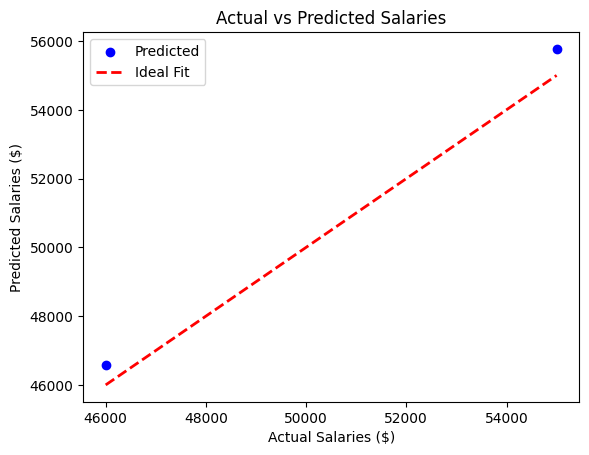

In [10]:
# Plot actual vs predicted salaries
plt.scatter(y_test, y_pred, color='blue', label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.title("Actual vs Predicted Salaries")
plt.xlabel("Actual Salaries ($)")
plt.ylabel("Predicted Salaries ($)")
plt.legend()
plt.show()


In [ ]:
# Predict salary based on user input
def predict_salary():
    age = float(input("Enter age: "))
    experience = float(input("Enter years of experience: "))
    work_hours = float(input("Enter work hours per week: "))
    country = input("Enter country (USA or India): ")

    # Transform input data
    input_data = pd.DataFrame([[age, experience, work_hours, country]], columns=["Age", "Experience (years)", "Work Hours (per week)", "Country"])
    input_data = column_transformer.transform(input_data)
    
    # Predict salary
    predicted_salary = model.predict(input_data)
    print(f"Predicted Salary: ${predicted_salary[0]:.2f}")

# Test the prediction interactively
predict_salary()
